## **Basic Descriptive Statistical Analysis**

In [1]:
# Import the library to mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Apply ggplot style
import matplotlib as mpl

#Import the style
mpl.style.use('ggplot')

#pruebas de hipótesis y análisis de regresión
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
#Indicate the path where the data is
filepath = '/content/drive/My Drive/Emotiv Research/Mexico/Analysis'
file_results = '/test_results.xlsx'
df = pd.read_excel(filepath + file_results)
df

,Participante,Genero,Edad,Aciertos_p2,Errores_p2,Accuracy_p2,Precision_p2,Aciertos_control,Errores_control,Accuracy_control,...,Aciertos_hl,Errores_hl,Accuracy_hl,Precision_hl,Mk_ll_valence,Mk_ll_arousal,Aciertos_ll,Errores_ll,Accuracy_ll,Precision_ll
0,1,M,18-30,1,1,0.800000,0.500,3,1,0.85,...,4,0,0.95,1.000,5,1,5,0,1.00,1.000
1,2,M,18-30,3,0,1.000000,1.000,4,1,0.90,...,5,0,1.00,1.000,3,2,4,0,0.95,1.000
2,3,M,18-30,3,0,1.000000,1.000,5,0,1.00,...,4,0,0.95,1.000,2,3,4,0,0.95,1.000
3,4,M,18-30,3,0,1.000000,1.000,5,1,0.95,...,4,0,0.95,1.000,3,3,5,0,1.00,1.000
4,5,M,18-30,1,3,0.667000,0.250,4,5,0.70,...,5,0,1.00,1.000,3,3,5,3,0.85,0.625
5,6,M,31-43,2,2,0.800000,0.500,5,0,1.00,...,5,2,0.90,0.714,3,2,4,0,0.95,1.000
6,7,M,31-43,2,2,0.800000,0.500,4,1,0.90,...,4,0,0.95,1.000,2,3,3,1,0.85,0.750
7,8,M,31-43,1,0,0.867000,1.000,5,0,1.00,...,3,0,0.90,1.000,2,3,3,1,0.85,0.750
8,9,M,31-43,3,0,1.000000,1.000,4,0,0.95,...,4,0,0.95,1.000,2,3,5,0,1.00,1.000
9,11,M,44-56,3,0,1.000000,1.000,5,0,1.00,...,5,2,0.90,0.714,3,2,4,0,0.95,1.000


In [4]:
# 1. Obtain basic statistical analysis for all accuracies
df_accuracies = df[['Accuracy_p2','Accuracy_control', 'Accuracy_hh', 'Accuracy_lh', 'Accuracy_hl', 'Accuracy_ll']]
df_accuracies.describe()

,Accuracy_p2,Accuracy_control,Accuracy_hh,Accuracy_lh,Accuracy_hl,Accuracy_ll
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.935267,0.920000,0.935714,0.915714,0.934286,0.904286
std,0.093523,0.111276,0.091210,0.070473,0.070473,0.097295
min,0.667000,0.450000,0.500000,0.750000,0.600000,0.600000
25%,0.867000,0.900000,0.900000,0.875000,0.900000,0.875000
50%,1.000000,0.950000,0.950000,0.900000,0.950000,0.900000
75%,1.000000,1.000000,1.000000,1.000000,0.950000,0.975000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-5-570c0b422dc9>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot1 = plt.boxplot(df_accuracies, vert=False, patch_artist=True, labels=['Práctica 2', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'])


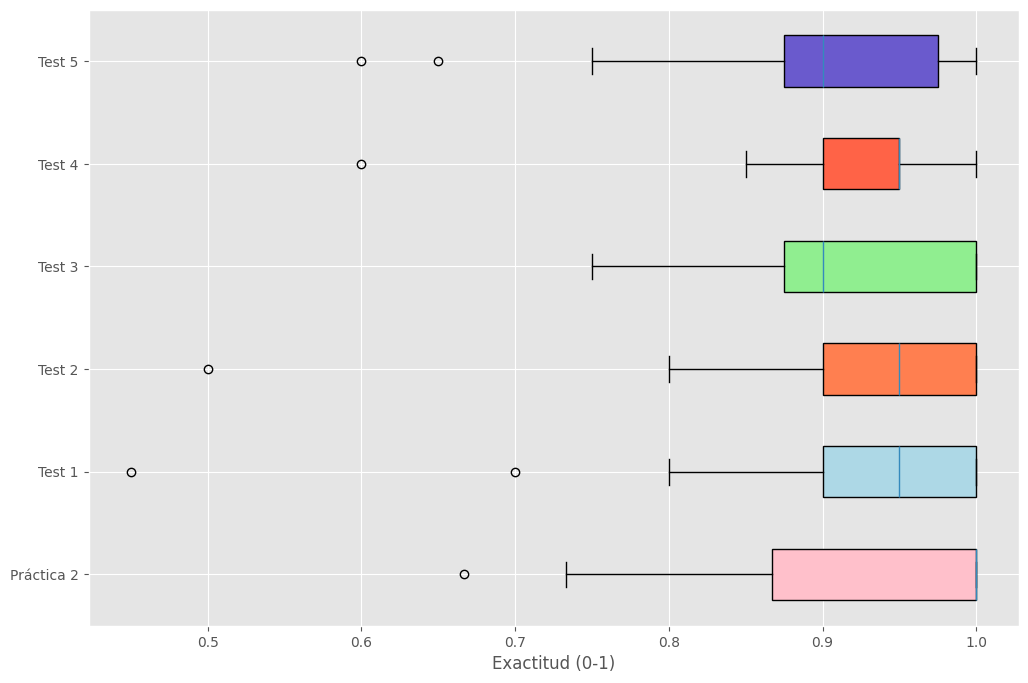

In [5]:
# 2. Plot the Box Plot for all accuracies
plt.figure(figsize=(12,8))
bplot1 = plt.boxplot(df_accuracies, vert=False, patch_artist=True, labels=['Práctica 2', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'])

colors = ['pink','lightblue', 'coral', 'lightgreen', 'tomato', 'slateblue']

# Itearate each boxplot to color it
for patch, color in zip(bplot1['boxes'], colors):
  patch.set_facecolor(color)

#plt.title('Cajas de bigote de la distribución de las exactitudes de cada test')
plt.xlabel('Exactitud (0-1)')

plt.show()

In [6]:
# Determine inferior outliers for Practice 2 Accuracy
Q1 = float(df_accuracies['Accuracy_p2'].quantile([0.25]))
Q3 = float(df_accuracies['Accuracy_p2'].quantile([0.75]))
IQR = Q3 - Q1
outliers_inf = Q1 - 1.5*IQR
print(f'The inferior limit is: {outliers_inf}')

# Find those outliers
df_accuracies[df_accuracies['Accuracy_p2']< outliers_inf]

The inferior limit is: 0.6675


<ipython-input-6-877c071b53d8>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q1 = float(df_accuracies['Accuracy_p2'].quantile([0.25]))
<ipython-input-6-877c071b53d8>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q3 = float(df_accuracies['Accuracy_p2'].quantile([0.75]))


,Accuracy_p2,Accuracy_control,Accuracy_hh,Accuracy_lh,Accuracy_hl,Accuracy_ll
4,0.667,0.7,0.8,0.85,1.0,0.85


In [7]:
# Determine inferior outliers for Test 1 Accuracy
Q1 = float(df_accuracies['Accuracy_control'].quantile([0.25]))
Q3 = float(df_accuracies['Accuracy_control'].quantile([0.75]))
IQR = Q3 - Q1
outliers_inf = Q1 - 1.5*IQR
print(f'The inferior limit is: {outliers_inf}')

# Find those outliers
df_accuracies[df_accuracies['Accuracy_control']< outliers_inf]

The inferior limit is: 0.75


<ipython-input-7-1752aacc4bda>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q1 = float(df_accuracies['Accuracy_control'].quantile([0.25]))
<ipython-input-7-1752aacc4bda>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q3 = float(df_accuracies['Accuracy_control'].quantile([0.75]))


,Accuracy_p2,Accuracy_control,Accuracy_hh,Accuracy_lh,Accuracy_hl,Accuracy_ll
4,0.667,0.70,0.8,0.85,1.00,0.85
11,0.733,0.45,0.9,0.75,0.95,0.75


In [8]:
# Determine inferior outliers for Test 2 Accuracy
Q1 = float(df_accuracies['Accuracy_hh'].quantile([0.25]))
Q3 = float(df_accuracies['Accuracy_hh'].quantile([0.75]))
IQR = Q3 - Q1
outliers_inf = Q1 - 1.5*IQR
print(f'The inferior limit is: {outliers_inf}')

# Find those outliers
df_accuracies[df_accuracies['Accuracy_hh']< outliers_inf]

The inferior limit is: 0.75


<ipython-input-8-fe66e1fc23bd>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q1 = float(df_accuracies['Accuracy_hh'].quantile([0.25]))
<ipython-input-8-fe66e1fc23bd>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q3 = float(df_accuracies['Accuracy_hh'].quantile([0.75]))


,Accuracy_p2,Accuracy_control,Accuracy_hh,Accuracy_lh,Accuracy_hl,Accuracy_ll
13,0.933,0.95,0.5,0.8,0.6,0.6


In [9]:
# Determine inferior outliers for Test 3 Accuracy
Q1 = float(df_accuracies['Accuracy_lh'].quantile([0.25]))
Q3 = float(df_accuracies['Accuracy_lh'].quantile([0.75]))
IQR = Q3 - Q1
outliers_inf = Q1 - 1.5*IQR
print(f'The inferior limit is: {outliers_inf}')

# Find those outliers
df_accuracies[df_accuracies['Accuracy_lh']< outliers_inf]

The inferior limit is: 0.6875


<ipython-input-9-bd8470647670>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q1 = float(df_accuracies['Accuracy_lh'].quantile([0.25]))
<ipython-input-9-bd8470647670>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q3 = float(df_accuracies['Accuracy_lh'].quantile([0.75]))


,Accuracy_p2,Accuracy_control,Accuracy_hh,Accuracy_lh,Accuracy_hl,Accuracy_ll


In [10]:
# Determine inferior outliers for Test 4 Accuracy
Q1 = float(df_accuracies['Accuracy_hl'].quantile([0.25]))
Q3 = float(df_accuracies['Accuracy_hl'].quantile([0.75]))
IQR = Q3 - Q1
outliers_inf = Q1 - 1.5*IQR
print(f'The inferior limit is: {outliers_inf}')

# Find those outliers
df_accuracies[df_accuracies['Accuracy_hl']< outliers_inf]

The inferior limit is: 0.8250000000000002


<ipython-input-10-bfed82f88b55>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q1 = float(df_accuracies['Accuracy_hl'].quantile([0.25]))
<ipython-input-10-bfed82f88b55>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q3 = float(df_accuracies['Accuracy_hl'].quantile([0.75]))


,Accuracy_p2,Accuracy_control,Accuracy_hh,Accuracy_lh,Accuracy_hl,Accuracy_ll
13,0.933,0.95,0.5,0.8,0.6,0.6


In [11]:
# Determine inferior outliers for Test 5 Accuracy
Q1 = float(df_accuracies['Accuracy_ll'].quantile([0.25]))
Q3 = float(df_accuracies['Accuracy_ll'].quantile([0.75]))
IQR = Q3 - Q1
outliers_inf = Q1 - 1.5*IQR
print(f'The inferior limit is: {outliers_inf}')

# Find those outliers
df_accuracies[df_accuracies['Accuracy_ll']< outliers_inf]

The inferior limit is: 0.7250000000000001


<ipython-input-11-3a4a4078189f>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q1 = float(df_accuracies['Accuracy_ll'].quantile([0.25]))
<ipython-input-11-3a4a4078189f>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q3 = float(df_accuracies['Accuracy_ll'].quantile([0.75]))


,Accuracy_p2,Accuracy_control,Accuracy_hh,Accuracy_lh,Accuracy_hl,Accuracy_ll
13,0.933,0.95,0.50,0.8,0.60,0.60
26,1.000,0.80,0.95,1.0,0.95,0.65


In [12]:
# 3. Obtain basic statistical analysis for all precisions
df_precisions = df[['Precision_p2','Precision_control', 'Precision_hh', 'Precision_lh', 'Precision_hl', 'Precision_ll']]
df_precisions.describe()

,Precision_p2,Precision_control,Precision_hh,Precision_lh,Precision_hl,Precision_ll
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.859543,0.880000,0.883295,0.833943,0.915971,0.848657
std,0.226144,0.182016,0.175987,0.145024,0.142838,0.212230
min,0.250000,0.286000,0.222000,0.500000,0.333000,0.200000
25%,0.708500,0.800000,0.800000,0.750000,0.833000,0.750000
50%,1.000000,1.000000,1.000000,0.800000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-13-fe717b0c06d7>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot2 = plt.boxplot(df_precisions, patch_artist=True, vert=False, labels=['Práctica 2', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'])


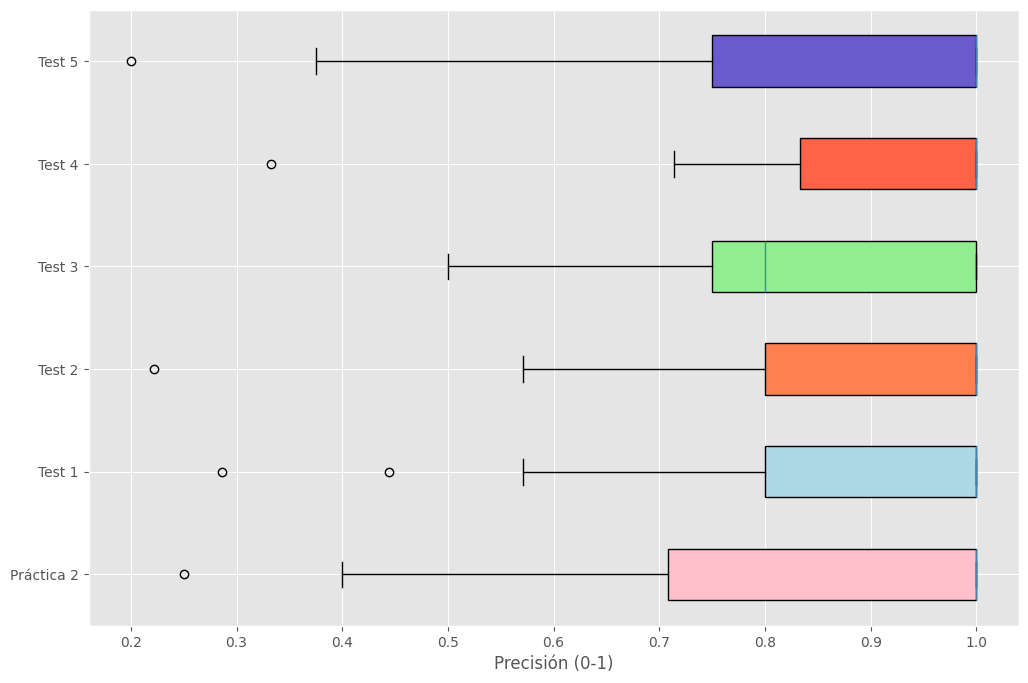

In [13]:
# 4. Plot the Box Plot for all accuracies
plt.figure(figsize=(12,8))
bplot2 = plt.boxplot(df_precisions, patch_artist=True, vert=False, labels=['Práctica 2', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'])

colors = ['pink','lightblue', 'coral', 'lightgreen', 'tomato', 'slateblue']

# Itearate each boxplot to color it
for patch, color in zip(bplot2['boxes'], colors):
  patch.set_facecolor(color)

#plt.title('Cajas de bigote de la distribución de las precisiones de cada test')
plt.xlabel('Precisión (0-1)')

plt.show()

In [14]:
# Determine inferior outliers for Practice 2 Precision
Q1 = float(df_precisions['Precision_p2'].quantile([0.25]))
Q3 = float(df_precisions['Precision_p2'].quantile([0.75]))
IQR = Q3 - Q1
outliers_inf = Q1 - 1.5*IQR
print(f'The inferior limit is: {outliers_inf}')

# Find those outliers
df_precisions[df_precisions['Precision_p2']< outliers_inf]

The inferior limit is: 0.27125000000000005


<ipython-input-14-9f2e262411d3>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q1 = float(df_precisions['Precision_p2'].quantile([0.25]))
<ipython-input-14-9f2e262411d3>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q3 = float(df_precisions['Precision_p2'].quantile([0.75]))


,Precision_p2,Precision_control,Precision_hh,Precision_lh,Precision_hl,Precision_ll
4,0.25,0.444,0.571,0.667,1.0,0.625


In [15]:
# Determine inferior outliers for Test 1 Precision
Q1 = float(df_precisions['Precision_control'].quantile([0.25]))
Q3 = float(df_precisions['Precision_control'].quantile([0.75]))
IQR = Q3 - Q1
outliers_inf = Q1 - 1.5*IQR
print(f'The inferior limit is: {outliers_inf}')

# Find those outliers
df_precisions[df_precisions['Precision_control']< outliers_inf]

The inferior limit is: 0.5000000000000001


<ipython-input-15-fbfbda622632>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q1 = float(df_precisions['Precision_control'].quantile([0.25]))
<ipython-input-15-fbfbda622632>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q3 = float(df_precisions['Precision_control'].quantile([0.75]))


,Precision_p2,Precision_control,Precision_hh,Precision_lh,Precision_hl,Precision_ll
4,0.25,0.444,0.571,0.667,1.000,0.625
11,0.40,0.286,0.714,0.500,0.833,0.500


In [16]:
# Determine inferior outliers for Test 2 Precision
Q1 = float(df_precisions['Precision_hh'].quantile([0.25]))
Q3 = float(df_precisions['Precision_hh'].quantile([0.75]))
IQR = Q3 - Q1
outliers_inf = Q1 - 1.5*IQR
print(f'The inferior limit is: {outliers_inf}')

# Find those outliers
df_precisions[df_precisions['Precision_hh']< outliers_inf]

The inferior limit is: 0.5000000000000001


<ipython-input-16-1a0fceda589b>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q1 = float(df_precisions['Precision_hh'].quantile([0.25]))
<ipython-input-16-1a0fceda589b>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q3 = float(df_precisions['Precision_hh'].quantile([0.75]))


,Precision_p2,Precision_control,Precision_hh,Precision_lh,Precision_hl,Precision_ll
13,1.0,0.833,0.222,0.571,0.333,0.2


In [17]:
# Determine inferior outliers for Test 3 Precision
Q1 = float(df_precisions['Precision_lh'].quantile([0.25]))
Q3 = float(df_precisions['Precision_lh'].quantile([0.75]))
IQR = Q3 - Q1
outliers_inf = Q1 - 1.5*IQR
print(f'The inferior limit is: {outliers_inf}')

# Find those outliers
df_precisions[df_precisions['Precision_lh']< outliers_inf]

The inferior limit is: 0.375


<ipython-input-17-cb33cf342911>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q1 = float(df_precisions['Precision_lh'].quantile([0.25]))
<ipython-input-17-cb33cf342911>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q3 = float(df_precisions['Precision_lh'].quantile([0.75]))


,Precision_p2,Precision_control,Precision_hh,Precision_lh,Precision_hl,Precision_ll


In [18]:
# Determine inferior outliers for Test 4 Precision
Q1 = float(df_precisions['Precision_hl'].quantile([0.25]))
Q3 = float(df_precisions['Precision_hl'].quantile([0.75]))
IQR = Q3 - Q1
outliers_inf = Q1 - 1.5*IQR
print(f'The inferior limit is: {outliers_inf}')

# Find those outliers
df_precisions[df_precisions['Precision_hl']< outliers_inf]

The inferior limit is: 0.5824999999999999


<ipython-input-18-0eb6f1c434df>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q1 = float(df_precisions['Precision_hl'].quantile([0.25]))
<ipython-input-18-0eb6f1c434df>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q3 = float(df_precisions['Precision_hl'].quantile([0.75]))


,Precision_p2,Precision_control,Precision_hh,Precision_lh,Precision_hl,Precision_ll
13,1.0,0.833,0.222,0.571,0.333,0.2


In [19]:
# Determine inferior outliers for Test 5 Precision
Q1 = float(df_precisions['Precision_ll'].quantile([0.25]))
Q3 = float(df_precisions['Precision_ll'].quantile([0.75]))
IQR = Q3 - Q1
outliers_inf = Q1 - 1.5*IQR
print(f'The inferior limit is: {outliers_inf}')

# Find those outliers
df_precisions[df_precisions['Precision_ll']< outliers_inf]

The inferior limit is: 0.375


<ipython-input-19-6c9427a76071>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q1 = float(df_precisions['Precision_ll'].quantile([0.25]))
<ipython-input-19-6c9427a76071>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Q3 = float(df_precisions['Precision_ll'].quantile([0.75]))


,Precision_p2,Precision_control,Precision_hh,Precision_lh,Precision_hl,Precision_ll
13,1.0,0.833,0.222,0.571,0.333,0.2


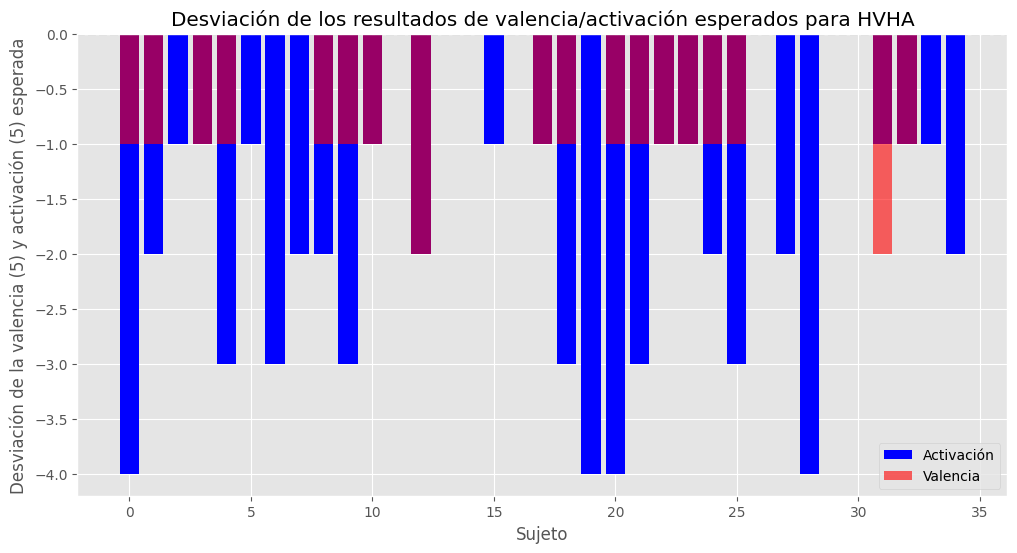

In [44]:
# Difference from expected (5) valence and arousal for HVHA
arousal_diff = np.array(df['Mk_hh_arousal']) - 5
valence_diff = np.array(df['Mk_hh_valence']) - 5

plt.figure(figsize=(12,6))
plt.bar(range(len(arousal_diff)), arousal_diff, color='blue', label='Activación')
plt.bar(range(len(valence_diff)), valence_diff, color='red', alpha=0.6, label='Valencia')
plt.axhline(0, color='k', linestyle='--')
plt.ylabel('Desviación de la valencia (5) y activación (5) esperada')
plt.xlabel('Sujeto')
plt.title('Desviación de los resultados de valencia/activación esperados para HVHA')
plt.legend()
plt.show()


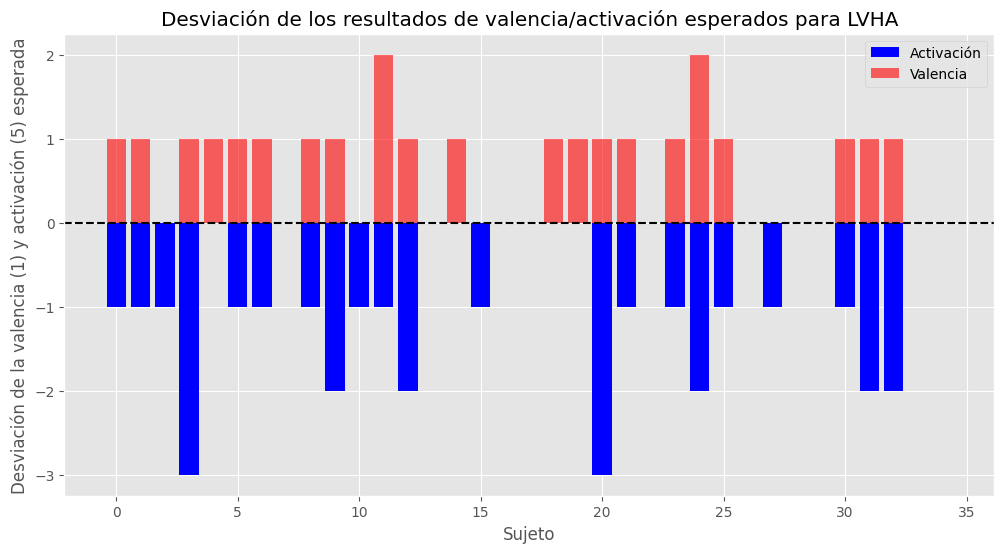

In [45]:
# Difference from expected valence (1) and arousal (5) for LVHA
arousal_diff = np.array(df['Mk_lh_arousal']) - 5
valence_diff = np.array(df['Mk_lh_valence']) - 1

plt.figure(figsize=(12,6))
plt.bar(range(len(arousal_diff)), arousal_diff, color='blue', label='Activación')
plt.bar(range(len(valence_diff)), valence_diff, color='red', alpha=0.6, label='Valencia')
plt.axhline(0, color='k', linestyle='--')
plt.ylabel('Desviación de la valencia (1) y activación (5) esperada')
plt.xlabel('Sujeto')
plt.title('Desviación de los resultados de valencia/activación esperados para LVHA')
plt.legend()
plt.show()


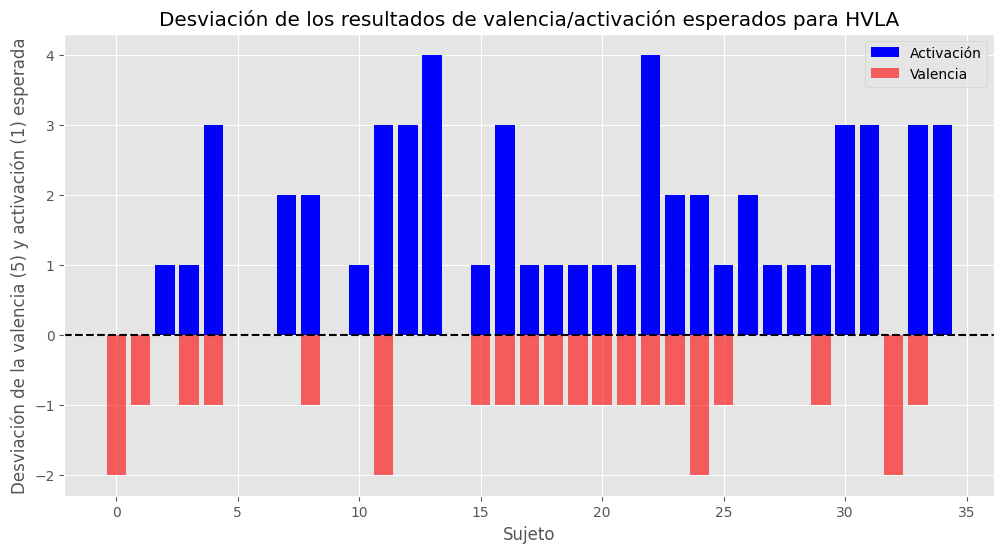

In [46]:
# Difference from expected valence (5) and arousal (1) for LVHA
arousal_diff = np.array(df['Mk_hl_arousal']) - 1
valence_diff = np.array(df['Mk_hl_valence']) - 5

plt.figure(figsize=(12,6))
plt.bar(range(len(arousal_diff)), arousal_diff, color='blue', label='Activación')
plt.bar(range(len(valence_diff)), valence_diff, color='red', alpha=0.6, label='Valencia')
plt.axhline(0, color='k', linestyle='--')
plt.ylabel('Desviación de la valencia (5) y activación (1) esperada')
plt.xlabel('Sujeto')
plt.title('Desviación de los resultados de valencia/activación esperados para HVLA')
plt.legend()
plt.show()


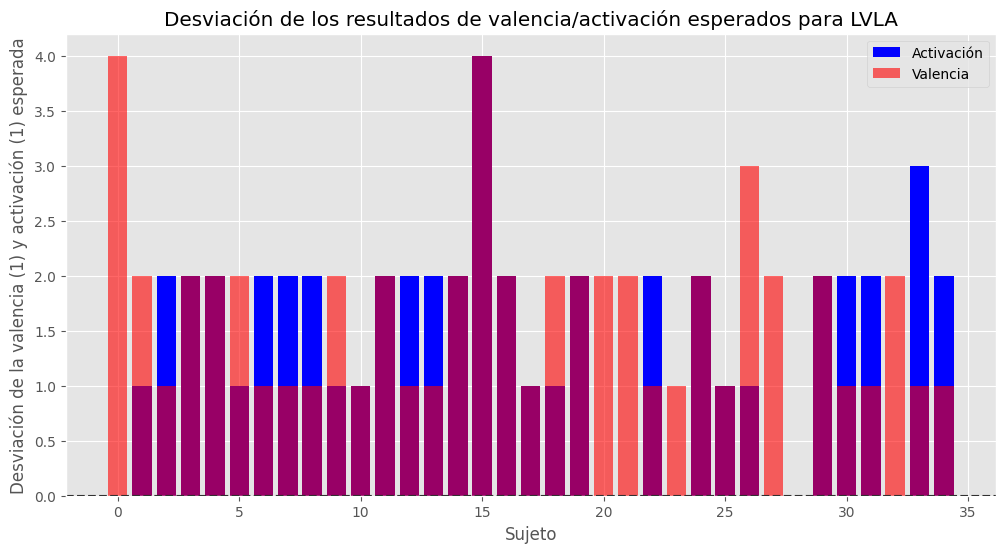

In [47]:
# Difference from expected valence (5) and arousal (1) for LVHA
arousal_diff = np.array(df['Mk_ll_arousal']) - 1
valence_diff = np.array(df['Mk_ll_valence']) - 1

plt.figure(figsize=(12,6))
plt.bar(range(len(arousal_diff)), arousal_diff, color='blue', label='Activación')
plt.bar(range(len(valence_diff)), valence_diff, color='red', alpha=0.6, label='Valencia')
plt.axhline(0, color='k', linestyle='--')
plt.ylabel('Desviación de la valencia (1) y activación (1) esperada')
plt.xlabel('Sujeto')
plt.title('Desviación de los resultados de valencia/activación esperados para LVLA')
plt.legend()
plt.show()


## **Regression Model**

In [24]:
# Combine all data to create a linear model

# Select only columns with 'valence' in the name
valence_columns = df.filter(like='valence')

# Select only columns with 'arousal' in the name
arousal_columns = df.filter(like='arousal')

# Select only columns with 'accuracy' in the name
accuracy_columns = df[['Accuracy_hh', 'Accuracy_lh', 'Accuracy_hl', 'Accuracy_ll']]

# Select only columns with 'precision' in the name
precision_columns = df[['Precision_hh', 'Precision_lh', 'Precision_hl', 'Precision_ll']]

# Stack all values into a single Series and reset the index
data = pd.DataFrame({
    'valence': valence_columns.stack().reset_index(drop=True),
    'arousal': arousal_columns.stack().reset_index(drop=True),
    'accuracy': accuracy_columns.stack().reset_index(drop=True),
    'precision': precision_columns.stack().reset_index(drop=True)
    })
data

,valence,arousal,accuracy,precision
0,4,1,0.90,0.80
1,2,4,0.85,0.75
2,3,1,0.95,1.00
3,5,1,1.00,1.00
4,4,3,1.00,1.00
...,...,...,...,...
135,2,4,1.00,1.00
136,5,3,0.95,1.00
137,1,5,0.85,0.75
138,5,4,0.95,1.00


In [25]:
#Asignamos las variables X y Y
x = data.drop(columns=['accuracy', 'precision'])
y = data['accuracy']
print(x)
print(y)

     valence  arousal
0          4        1
1          2        4
2          3        1
3          5        1
4          4        3
..       ...      ...
135        2        4
136        5        3
137        1        5
138        5        4
139        2        3

[140 rows x 2 columns]
0      0.90
1      0.85
2      0.95
3      1.00
4      1.00
       ... 
135    1.00
136    0.95
137    0.85
138    0.95
139    1.00
Name: accuracy, Length: 140, dtype: float64


In [26]:
#Dividimos la data train test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#nos aseguramos que se hayan repartido correctamente
print("Dimensiones x_train: ", x_train.shape)
print("Dimensiones y_train: ", y_train.shape)
print("Dimensiones x_test: ", x_test.shape)
print("Dimensiones y_test: ", y_test.shape)

Dimensiones x_train:  (112, 2)
Dimensiones y_train:  (112,)
Dimensiones x_test:  (28, 2)
Dimensiones y_test:  (28,)


In [27]:
#Cremaos y entrenamos el modelo
model = sm.OLS(y_train,x_train).fit()

#Imprimimos el modeo
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               accuracy   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              709.8
Date:                Tue, 13 May 2025   Prob (F-statistic):                    1.33e-63
Time:                        02:32:37   Log-Likelihood:                         -3.1075
No. Observations:                 112   AIC:                                      10.22
Df Residuals:                     110   BIC:                                      15.65
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [28]:
#Asignamos las variables X y Y
x = data.drop(columns=['accuracy', 'precision'])
x = sm.add_constant(x)
y = data['precision']
print(x)
print(y)

     const  valence  arousal
0      1.0        4        1
1      1.0        2        4
2      1.0        3        1
3      1.0        5        1
4      1.0        4        3
..     ...      ...      ...
135    1.0        2        4
136    1.0        5        3
137    1.0        1        5
138    1.0        5        4
139    1.0        2        3

[140 rows x 3 columns]
0      0.80
1      0.75
2      1.00
3      1.00
4      1.00
       ... 
135    1.00
136    1.00
137    0.75
138    1.00
139    1.00
Name: precision, Length: 140, dtype: float64


In [29]:
#Dividimos la data train test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#nos aseguramos que se hayan repartido correctamente
print("Dimensiones x_train: ", x_train.shape)
print("Dimensiones y_train: ", y_train.shape)
print("Dimensiones x_test: ", x_test.shape)
print("Dimensiones y_test: ", y_test.shape)

Dimensiones x_train:  (112, 3)
Dimensiones y_train:  (112,)
Dimensiones x_test:  (28, 3)
Dimensiones y_test:  (28,)


In [30]:
#Cremaos y entrenamos el modelo
model = sm.OLS(y_train,x_train).fit()

#Imprimimos el modeo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              precision   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.302
Date:                Tue, 13 May 2025   Prob (F-statistic):              0.105
Time:                        02:32:37   Log-Likelihood:                 38.955
No. Observations:                 112   AIC:                            -71.91
Df Residuals:                     109   BIC:                            -63.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9503      0.068     13.939      0.0

In [31]:
#Asignamos las variables X y Y
x = data['arousal']
y = data['accuracy']
print(x)
print(y)

0      1
1      4
2      1
3      1
4      3
      ..
135    4
136    3
137    5
138    4
139    3
Name: arousal, Length: 140, dtype: int64
0      0.90
1      0.85
2      0.95
3      1.00
4      1.00
       ... 
135    1.00
136    0.95
137    0.85
138    0.95
139    1.00
Name: accuracy, Length: 140, dtype: float64


In [32]:
#Dividimos la data train test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#nos aseguramos que se hayan repartido correctamente
print("Dimensiones x_train: ", x_train.shape)
print("Dimensiones y_train: ", y_train.shape)
print("Dimensiones x_test: ", x_test.shape)
print("Dimensiones y_test: ", y_test.shape)

Dimensiones x_train:  (112,)
Dimensiones y_train:  (112,)
Dimensiones x_test:  (28,)
Dimensiones y_test:  (28,)


In [33]:
#Cremaos y entrenamos el modelo
model = sm.OLS(y_train,x_train).fit()

#Imprimimos el modeo
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               accuracy   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              619.1
Date:                Tue, 13 May 2025   Prob (F-statistic):                    3.24e-47
Time:                        02:32:37   Log-Likelihood:                         -45.032
No. Observations:                 112   AIC:                                      92.06
Df Residuals:                     111   BIC:                                      94.78
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

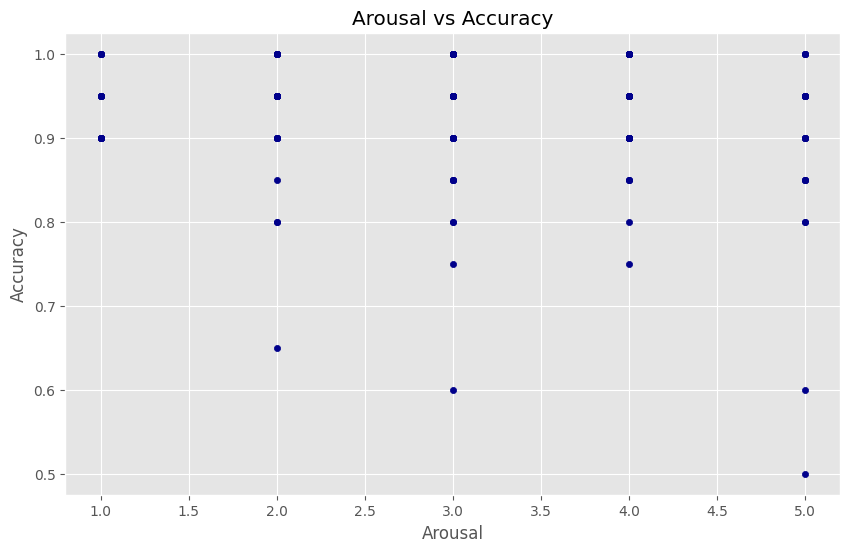

In [34]:
#Generamos el gráfico
data.plot(kind='scatter',x='arousal', y='accuracy', figsize=(10,6), color='darkblue')
plt.title('Arousal vs Accuracy')
plt.xlabel('Arousal')
plt.ylabel('Accuracy')
plt.show()

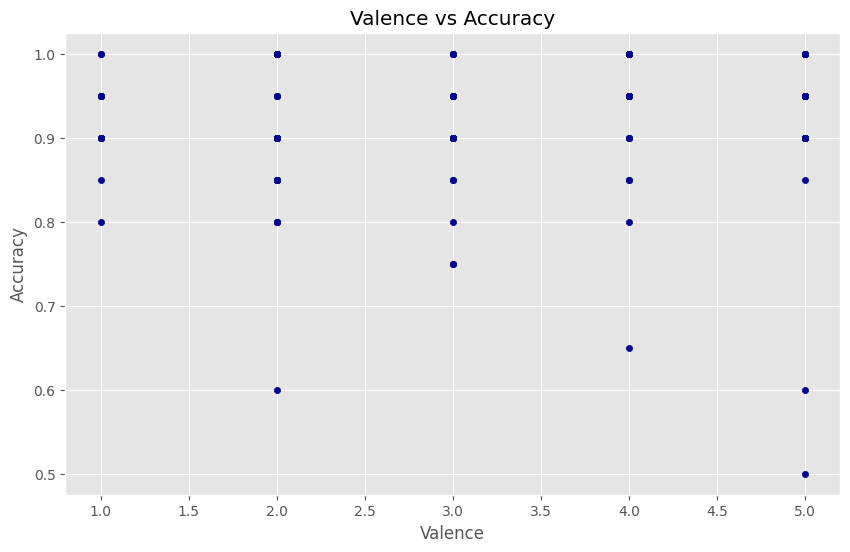

In [35]:
#Generamos el gráfico
data.plot(kind='scatter',x='valence', y='accuracy', figsize=(10,6), color='darkblue')
plt.title('Valence vs Accuracy')
plt.xlabel('Valence')
plt.ylabel('Accuracy')
plt.show()